In [4]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

## Calculate posterior using grid approximation (globe toss example)

Define the grid. This means you decide how many points to use in estimating the posterior, and then you make a list of the parameter values on the grid.

In [5]:
p_grid = np.linspace(0, 1, 20)
p_grid

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

Compute the value of the prior at each parameter value on the grid.

In [6]:
prior = np.array([1]*20)
prior

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Compute the likelihood at each parameter value.

In [7]:
likelihood = binom.pmf(6, 9, p_grid)
likelihood

array([0.00000000e+00, 1.51814898e-06, 8.18509295e-05, 7.77292279e-04,
       3.59857537e-03, 1.11609461e-02, 2.66829865e-02, 5.29210991e-02,
       9.08269760e-02, 1.38341326e-01, 1.89768623e-01, 2.36114658e-01,
       2.66611252e-01, 2.71400562e-01, 2.45005089e-01, 1.89768623e-01,
       1.17918118e-01, 5.02667021e-02, 8.85384487e-03, 0.00000000e+00])

Compute the unstandardized posterior at each parameter value, by multiplying the prior by the likelihood.

In [8]:
unstd_posterior = likelihood * prior
unstd_posterior

array([0.00000000e+00, 1.51814898e-06, 8.18509295e-05, 7.77292279e-04,
       3.59857537e-03, 1.11609461e-02, 2.66829865e-02, 5.29210991e-02,
       9.08269760e-02, 1.38341326e-01, 1.89768623e-01, 2.36114658e-01,
       2.66611252e-01, 2.71400562e-01, 2.45005089e-01, 1.89768623e-01,
       1.17918118e-01, 5.02667021e-02, 8.85384487e-03, 0.00000000e+00])

Finally, standardize the posterior, by dividing each value by the sum of all values.

In [9]:
posterior = unstd_posterior / np.sum(unstd_posterior)
posterior

array([0.00000000e+00, 7.98983711e-07, 4.30771684e-05, 4.09079660e-04,
       1.89388732e-03, 5.87387288e-03, 1.40429377e-02, 2.78517436e-02,
       4.78011547e-02, 7.28073907e-02, 9.98729639e-02, 1.24264330e-01,
       1.40314323e-01, 1.42834880e-01, 1.28943257e-01, 9.98729639e-02,
       6.20588995e-02, 2.64547661e-02, 4.65967300e-03, 0.00000000e+00])

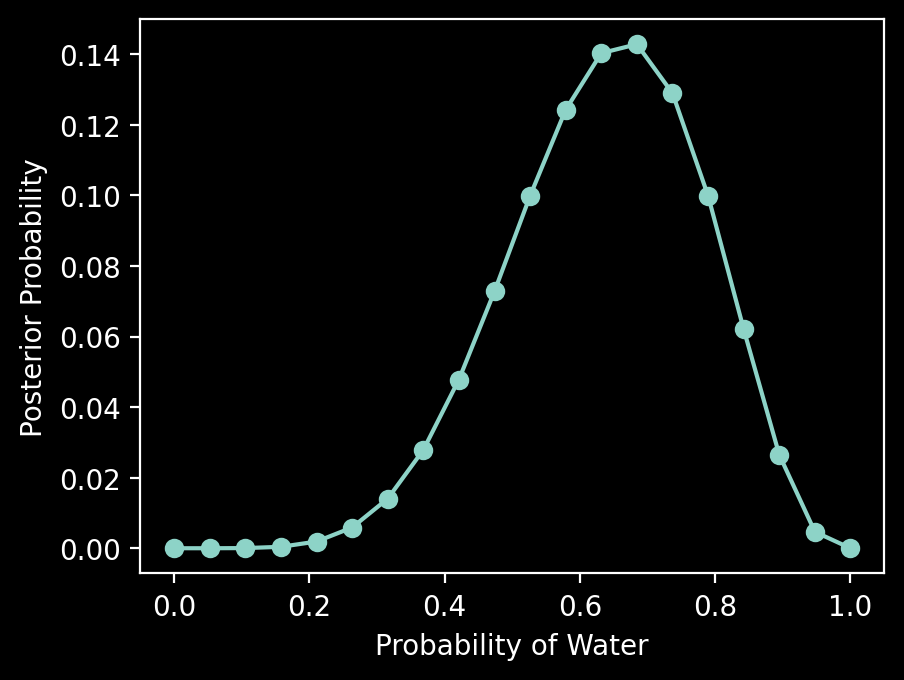

In [10]:
plt.plot(p_grid, posterior, "o-")
plt.xlabel("Probability of Water")
plt.ylabel("Posterior Probability")
plt.show()

## Using different priors

In [11]:
def posterior_calc(prior_func, n):
    p_grid = np.linspace(0, 1, n)
    prior = prior_func(p_grid)
    likelihood = binom.pmf(6, 9, p_grid)
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / np.sum(unstd_posterior)
    
    plt.plot(p_grid, posterior, "o-")
    plt.xlabel("Probability of Water")
    plt.ylabel("Posterior Probability")
    plt.show()

In [14]:
prior_func_1 = lambda p_grid: np.where(p_grid < 0.5, 0, 1)
prior_func_2 = lambda p_grid: np.exp(-5 * np.abs(p_grid - 0.5))

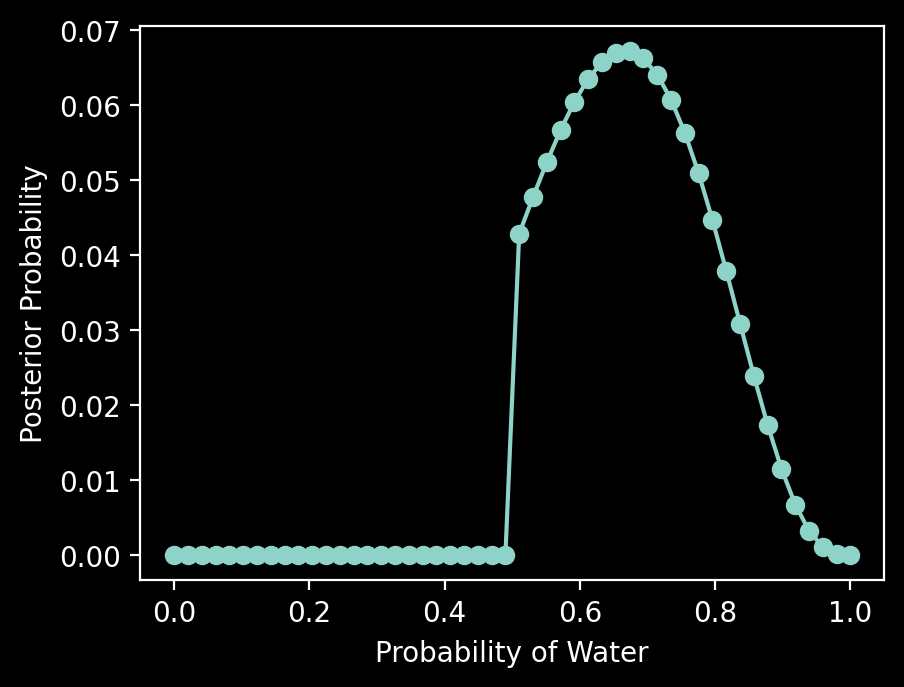

In [20]:
posterior_calc(prior_func_1, 50)

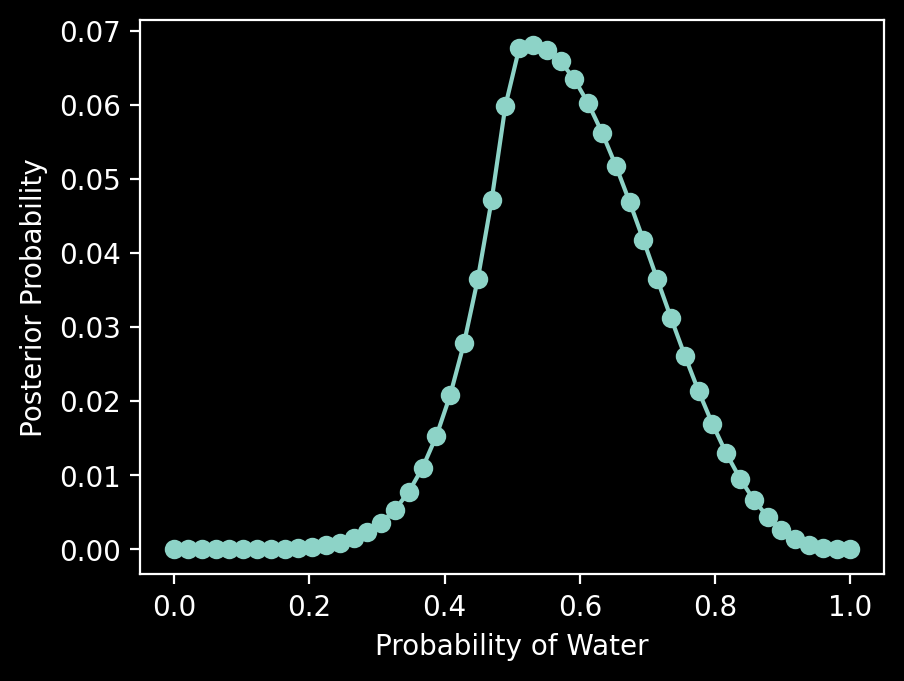

In [21]:
posterior_calc(prior_func_2, 50)